In [1]:
import math as m
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import IPython.display as ipd
import sympy as sy
import sympy.physics.units as units

x, y, z = sy.symbols('x y z')
sy.init_printing()

# LISTA 4 - QUESTÃO 2

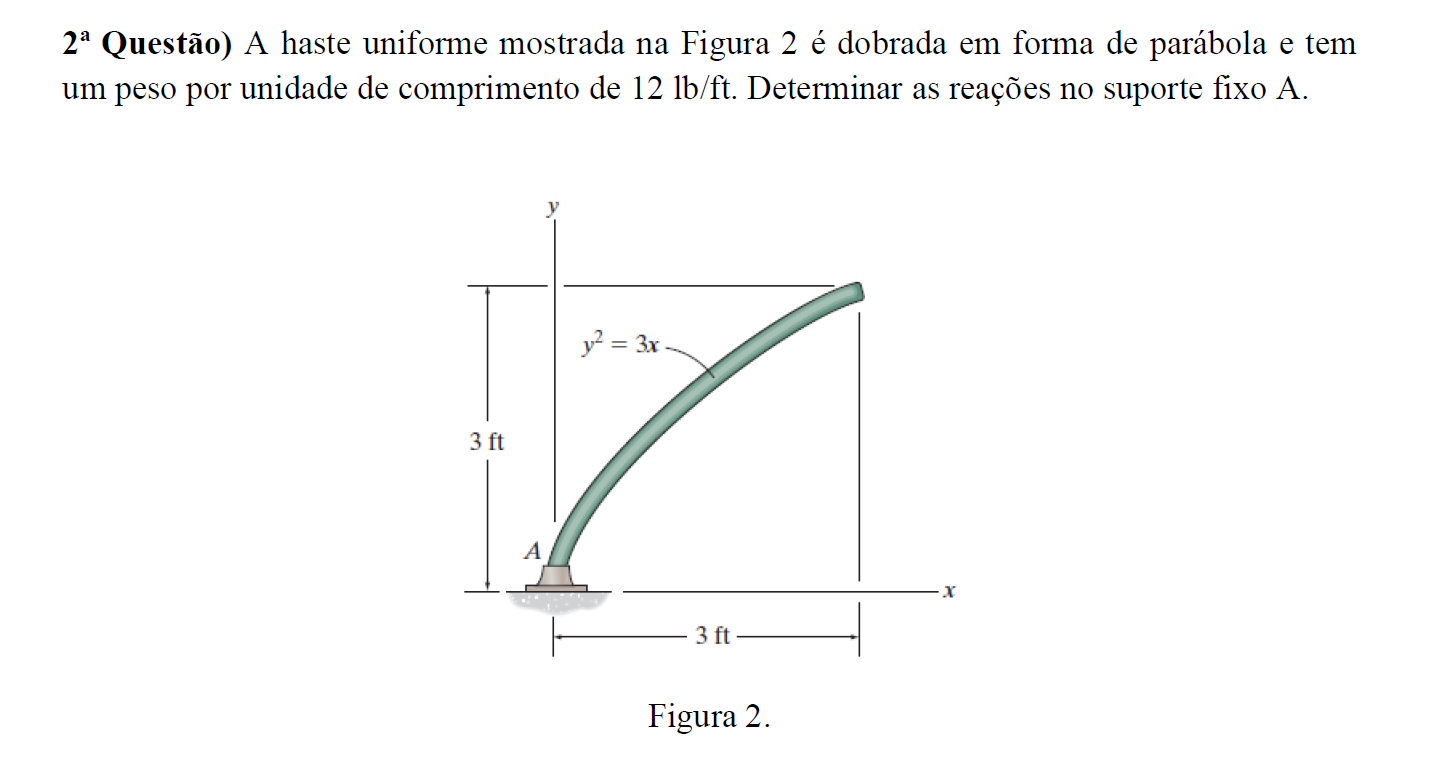

In [2]:
ipd.Image(filename='L4Q2.png')

### Dados Necessários

In [3]:
Lx = 3 # [ft]
Ly = 3 # [ft]
y = (3 * x) ** (1/2)
peso_linear = 12 # [lb / m]

Bloco da função de integral trapezoidal: <br>
utilizando a integral numérica, pois a função sympy integrate não funcionou como esperado.

In [4]:
def integral_trapezoidal(f, a, b, n):
    """
    Integração numérica por trapézios.
    n é o número de subintervalos
    a é o limite inferior
    b é o limite superior
    f é a função a ser integrada
    """
    h = (b - a) / n
    sum = 0
    for i in range(1, n):
        sum += f(a + i * h)
    return (h / 2) * (f(a) + 2 * sum + f(b))


def error_trapezoidal(f, a, b, n):
    """
    Calcula o erro do método de trapézios.
    """
    return abs(integral_trapezoidal(f, a, b, n) - integral_trapezoidal(f, a, b, 2 * n))



### Objetivo:
derivar a função y e realizar a sua integral de linha para descobrir o comprimento do arco. <br>
usamos a função diff para derivar:

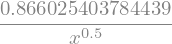

In [5]:
y_derivada = sy.diff(y, x)
y_derivada

A função a ser integrada:

In [6]:
funcao_linha = (1+1.5*x**(-0.5)**2)**0.5
funcao_linha

agora preciamos calcular a integral de linha:

In [7]:
def linha(linf, linsup, n):
    def integrar(x):
        return (1+1.5*x**(-0.5)**2)**0.5

    u = (1+1.5*x**(-0.5)**2)**0.5
    print('compriento do arco: {}'.format(integral_trapezoidal(integrar, linf, linsup, n)))
    print('erro associado: {}'.format(error_trapezoidal(integrar, linf, linsup, n)))
    return integral_trapezoidal(integrar, linf, linsup, n)

comprimento_arco = linha(0, Lx, 1000)

compriento do arco: 4.80764390704983
erro associado: 9.222295874788955e-05


In [8]:
peso_arco = comprimento_arco * peso_linear
peso_arco

In [9]:
print('peso do arco: {:.3f} lb'.format(peso_arco))

peso do arco: 57.692 lb


Na sequência, podemos determinar a coordenada x̅ do centroide da haste, a qual se trata da distância da linha de ação da força peso ao eixo y:

Calculando o momento associado por método numérico, temos:

In [18]:
def linha(linf, linsup, n):
    def integrar(x):
        return (3/2)*3*x*2*(1+1.5*x**(-0.5)**2)**0.5 # comprimento_arco * x (3/2) do arco

    u = x*(1+1.5*x**(-0.5)**2)**0.5
    print('compriento do arco: {:.3f}'.format(integral_trapezoidal(integrar, linf, linsup, n)))
    print('erro associado: {:.3e}'.format(error_trapezoidal(integrar, linf, linsup, n)))
    return integral_trapezoidal(integrar, linf, linsup, n)

momento_arco = linha(0, Lx, 1000)

compriento do arco: 67.175
erro associado: 3.868e-06


Agora podemos calcular o centroide em relação ao eixo X do arco:

In [17]:
x_barra = momento_arco / peso_arco
print('coordenada do centroide X: {:.3f} in'.format(x_barra))

coordenada do centroide X: 1.164 in
